# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import requests
import pandas as pd
import json
from citipy import citipy
import random

# Import API key
from api_keys import weather_api_key

## Generate Cities List

In [2]:
lat_list = []
lng_list = []
cities = []
# generate random cities list
for x in range(1200):
    # generate random latitude and longitude coordinates, store values in lists
    r_lat = random.randint(-90,91)
    r_lng = random.randint(-180,181)
    lat_list.append(r_lat)
    lng_list.append(r_lng)
    
    # generate cities and append list based on randomised lat,lng.
    city = citipy.nearest_city(r_lat,r_lng)
    cities.append(city.city_name)
    
    #print(f"{cities[x]} is nearest to the coordinates: {lat_list[x]} lat, {lng_list[x]} lng.")
    
len(cities)

1200

In [3]:
# original output for reference

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#configure url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# create list to store temperatures
owm_cities = []
lat = []
lng = []
temp = []
humid = []
cloud = []
wind_spd = []
country = []
date = []

# counters for numbering records 
a = 0
r = 0
s = 1

# header for records
print("Beginning Data Retrieval")
print("-----------------------------")

# function to capture exceptions where no data available
def cities_data(current_city,ci,la,ln,tm,hm,cl,ws,co,da,resp,rx,sx,ax):
    try:
        print(f"Processing Record {rx+1} of Set {sx} | {current_city[ax]}")
        ci.append(resp["name"])
        la.append(resp["coord"]["lat"])
        ln.append(resp["coord"]["lon"])
        tm.append(resp['main']['temp_max'])
        hm.append(resp['main']['humidity'])
        cl.append(resp["clouds"]["all"])
        ws.append(resp["wind"]["speed"])
        co.append(resp["sys"]["country"])
        da.append(resp["dt"])
    except KeyError:
        print(f"City not found. Skipping...")
        pass
    return  current_city,ci,la,ln,tm,hm,cl,co,da,resp,rx,sx,ax           

# loop through API request
for cit in cities:
    response = requests.get(query_url + cit).json()
    if a <= len(cities):
        if r < 49:
            cities_data(cities,owm_cities,lat,lng,temp,humid,cloud,wind_spd,country,date,response,r,s,a)
            r += 1
            a += 1
        else:
            cities_data(cities,owm_cities,lat,lng,temp,humid,cloud,wind_spd,country,date,response,r,s,a)
            r = 0
            a += 1
            s += 1
    else:
        print("Uh-oh, something went wrong!")

# footer for records
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | upernavik
Processing Record 6 of Set 1 | bela vista
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | curup
Processing Record 12 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 13 of Set 1 | saint george
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | husavik
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | nkongsamba
Processing Record 18 of Set 1 | rio gallegos
Processing Record 19 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | vaini
Proc

Processing Record 35 of Set 4 | mahebourg
Processing Record 36 of Set 4 | rikitea
Processing Record 37 of Set 4 | ushuaia
Processing Record 38 of Set 4 | totma
Processing Record 39 of Set 4 | oktyabrskoye
Processing Record 40 of Set 4 | yellowknife
Processing Record 41 of Set 4 | namatanai
Processing Record 42 of Set 4 | higuey
City not found. Skipping...
Processing Record 43 of Set 4 | albany
Processing Record 44 of Set 4 | san quintin
Processing Record 45 of Set 4 | vaini
Processing Record 46 of Set 4 | broken hill
Processing Record 47 of Set 4 | chokurdakh
Processing Record 48 of Set 4 | chagda
City not found. Skipping...
Processing Record 49 of Set 4 | mar del plata
Processing Record 50 of Set 4 | port alfred
Processing Record 1 of Set 5 | ushuaia
Processing Record 2 of Set 5 | flinders
Processing Record 3 of Set 5 | laguna
Processing Record 4 of Set 5 | vawkavysk
Processing Record 5 of Set 5 | barrow
Processing Record 6 of Set 5 | mataura
Processing Record 7 of Set 5 | lalomanu
Ci

Processing Record 26 of Set 8 | zaysan
Processing Record 27 of Set 8 | geraldton
Processing Record 28 of Set 8 | kysyl-syr
Processing Record 29 of Set 8 | atuona
Processing Record 30 of Set 8 | esperance
Processing Record 31 of Set 8 | ayia marina
Processing Record 32 of Set 8 | punta arenas
Processing Record 33 of Set 8 | katsuura
Processing Record 34 of Set 8 | hithadhoo
Processing Record 35 of Set 8 | te anau
Processing Record 36 of Set 8 | alofi
Processing Record 37 of Set 8 | maneadero
Processing Record 38 of Set 8 | nijar
Processing Record 39 of Set 8 | nyurba
Processing Record 40 of Set 8 | taolanaro
City not found. Skipping...
Processing Record 41 of Set 8 | along
Processing Record 42 of Set 8 | belushya guba
City not found. Skipping...
Processing Record 43 of Set 8 | jamestown
Processing Record 44 of Set 8 | buriti
Processing Record 45 of Set 8 | leningradskiy
Processing Record 46 of Set 8 | atuona
Processing Record 47 of Set 8 | watertown
Processing Record 48 of Set 8 | busse

Processing Record 17 of Set 12 | busselton
Processing Record 18 of Set 12 | sao filipe
Processing Record 19 of Set 12 | odweyne
Processing Record 20 of Set 12 | hilo
Processing Record 21 of Set 12 | tuktoyaktuk
Processing Record 22 of Set 12 | inongo
Processing Record 23 of Set 12 | saint-philippe
Processing Record 24 of Set 12 | alofi
Processing Record 25 of Set 12 | mataura
Processing Record 26 of Set 12 | hermanus
Processing Record 27 of Set 12 | ushuaia
Processing Record 28 of Set 12 | totness
Processing Record 29 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 30 of Set 12 | birao
Processing Record 31 of Set 12 | illoqqortoormiut
City not found. Skipping...
Processing Record 32 of Set 12 | kapaa
Processing Record 33 of Set 12 | makaha
Processing Record 34 of Set 12 | evensk
Processing Record 35 of Set 12 | saldanha
Processing Record 36 of Set 12 | mataura
Processing Record 37 of Set 12 | marzuq
Processing Record 38 of Set 12 | grand-lahou
Processing Record 

Processing Record 4 of Set 16 | bredasdorp
Processing Record 5 of Set 16 | hobart
Processing Record 6 of Set 16 | wewak
Processing Record 7 of Set 16 | rikitea
Processing Record 8 of Set 16 | puerto ayora
Processing Record 9 of Set 16 | pokhara
Processing Record 10 of Set 16 | sao filipe
Processing Record 11 of Set 16 | rikitea
Processing Record 12 of Set 16 | port alfred
Processing Record 13 of Set 16 | kapaa
Processing Record 14 of Set 16 | lata
Processing Record 15 of Set 16 | chunoyar
Processing Record 16 of Set 16 | nizhneyansk
City not found. Skipping...
Processing Record 17 of Set 16 | georgetown
Processing Record 18 of Set 16 | diapaga
Processing Record 19 of Set 16 | guadalupe y calvo
Processing Record 20 of Set 16 | victoria
Processing Record 21 of Set 16 | plettenberg bay
Processing Record 22 of Set 16 | blackwater
Processing Record 23 of Set 16 | hobart
Processing Record 24 of Set 16 | vaitupu
City not found. Skipping...
Processing Record 25 of Set 16 | champerico
Processin

Processing Record 36 of Set 19 | sitka
Processing Record 37 of Set 19 | tessalit
Processing Record 38 of Set 19 | atuona
Processing Record 39 of Set 19 | ilulissat
Processing Record 40 of Set 19 | castrillon
Processing Record 41 of Set 19 | khatanga
Processing Record 42 of Set 19 | avarua
Processing Record 43 of Set 19 | puerto ayora
Processing Record 44 of Set 19 | hithadhoo
Processing Record 45 of Set 19 | kapaa
Processing Record 46 of Set 19 | conakry
Processing Record 47 of Set 19 | talnakh
Processing Record 48 of Set 19 | hermanus
Processing Record 49 of Set 19 | busselton
Processing Record 50 of Set 19 | aklavik
Processing Record 1 of Set 20 | nushki
Processing Record 2 of Set 20 | port alfred
Processing Record 3 of Set 20 | gizo
Processing Record 4 of Set 20 | kapaa
Processing Record 5 of Set 20 | nikolskoye
Processing Record 6 of Set 20 | alice springs
Processing Record 7 of Set 20 | ranong
Processing Record 8 of Set 20 | hobart
Processing Record 9 of Set 20 | chuy
Processing R

Processing Record 21 of Set 23 | vaini
Processing Record 22 of Set 23 | baherden
Processing Record 23 of Set 23 | qasigiannguit
Processing Record 24 of Set 23 | cape town
Processing Record 25 of Set 23 | bredasdorp
Processing Record 26 of Set 23 | castro
Processing Record 27 of Set 23 | sao joao da barra
Processing Record 28 of Set 23 | jamestown
Processing Record 29 of Set 23 | pushkinskiye gory
Processing Record 30 of Set 23 | qaanaaq
Processing Record 31 of Set 23 | srednekolymsk
Processing Record 32 of Set 23 | mar del plata
Processing Record 33 of Set 23 | kruisfontein
Processing Record 34 of Set 23 | mataura
Processing Record 35 of Set 23 | mar del plata
Processing Record 36 of Set 23 | cidreira
Processing Record 37 of Set 23 | saldanha
Processing Record 38 of Set 23 | hearst
Processing Record 39 of Set 23 | ohaba lunga
City not found. Skipping...
Processing Record 40 of Set 23 | illoqqortoormiut
City not found. Skipping...
Processing Record 41 of Set 23 | mnogovershinnyy
Process

In [10]:
print(len(cities),a,len(owm_cities),len(lat),len(lng),len(temp),len(humid),len(cloud),len(wind_spd),len(country),len(date))
#print(json.dumps(response, indent=4, sort_keys=True))

1200 1200 1105 1105 1105 1105 1105 1105 1105 1105 1105


In [13]:
# original output for reference

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# create new DataFrame with the data extracted from the JSON of openweathermap.org
df = pd.DataFrame ({
    "City": owm_cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Humidity": humid,
    "Cloudiness": cloud,
    "Wind Speed": wind_spd,
    "Country": country,
    "Date": date
})

# drop any duplicate cities from the DataFrame
clean_df = df.drop_duplicates()
clean_df.tail(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1084,Punta Arenas,-53.1500,-70.9167,42.80,70,40,9.22,CL,1610337595
1087,Albany,42.6001,-73.9662,23.00,100,75,2.06,US,1610337469
1088,Kiama,-34.6833,150.8667,82.00,65,48,15.01,AU,1610337597
1089,Moose Factory,51.2585,-80.6094,19.40,93,90,16.11,CA,1610337598
1093,Adeje,28.1227,-16.7260,60.01,72,20,4.61,ES,1610337600
1094,Salinas,36.6777,-121.6555,55.40,67,1,3.44,US,1610337601
1095,Beringovskiy,63.0500,179.3167,-21.05,84,7,13.67,RU,1610337603
1096,Bhadrāchalam,17.6667,80.8833,79.12,49,84,1.83,IN,1610337421
1101,Moissac,44.1024,1.0945,28.00,93,0,4.61,FR,1610337606
1103,Madison,34.7334,-86.5667,36.00,69,90,5.75,US,1610337480


In [15]:
# original output for reference

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [7]:
# get summary statistics using the .describe() method
clean_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,4.790000e+02
mean,19.438508,18.115807,49.107829,74.699374,56.273486,7.816180,1.610337e+09
std,33.854020,90.679515,32.430933,19.046118,39.321313,5.761766,1.968087e+02
min,-54.800000,-179.166700,-38.830000,11.000000,0.000000,0.340000,1.610337e+09
25%,-6.169300,-59.113950,28.020000,66.000000,14.500000,3.440000,1.610337e+09
50%,21.469400,22.224700,59.000000,80.000000,75.000000,6.420000,1.610337e+09
75%,47.208350,100.359050,76.390000,88.000000,91.500000,10.840000,1.610337e+09
max,78.218600,179.316700,98.600000,100.000000,100.000000,34.520000,1.610338e+09


In [16]:
# original output for reference

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


In [8]:
# export DataFrame to CSV
output_csv = clean_df.to_csv("../output_data/cities.csv")
output_csv

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# original output for reference

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [9]:
#  Get the indices of cities that have humidity over 100%.
indices = clean_df.index[clean_df["Humidity"]>100]
indices

Int64Index([], dtype='int64')

In [17]:
# original output for reference

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [ ]:
# not required: no cities in dataframe clean_df have > 100% humidity

In [270]:
#test = clean_df.loc[clean_df["Lat"]>=0,:]
#test["Lat"]

0       65.6145
2       55.1001
3       42.0970
4       69.7008
6       22.0752
         ...   
1074    45.0000
1078    54.7909
1087     8.8865
1091    50.6996
1093    22.8909
Name: Lat, Length: 360, dtype: float64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [27]:
# define function to run all scatter plots comparing latitude to various criteria
def scatter_plot(x_axis, y_axis, x_lab, y_lab, x_lim_0, x_lim_1, y_lim_0, y_lim_1, chart_title):
    plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.xlim(x_lim_0, x_lim_1)
    plt.ylim(y_lim_0, y_lim_1)
    plt.title(chart_title)
    
    return x_axis, y_axis, x_lab, y_lab, x_lim_0, x_lim_1, y_lim_0, y_lim_1, chart_title

# DataFrame series set as variables used for above function 
lat_plot = clean_df.Lat
temp_plot = clean_df["Max Temp"]
humid_plot = clean_df.Humidity
cloud_plot = clean_df.Cloudiness
wind_spd_plot = clean_df["Wind Speed"]


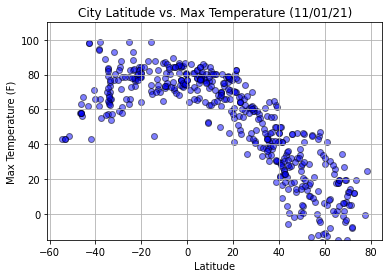

The scatter plot shows a generally higher temperature range at lower latitudes (between -20 and 20) with significantly lower temperatures further from the equator (e.g. 40 - 80).


In [29]:
# plot a scatter plot comparing City Latitude to Maximum Temperature 
scatter_plot(lat_plot, temp_plot, "Latitude", "Max Temperature (F)", -61, 85, -15, 110, "City Latitude vs. Max Temperature (11/01/21)")
plt.grid()

# export .png 
plt.savefig("../output_data/Fig1.png")

plt.show()

# print analysis
print(f"The scatter plot shows a generally higher temperature range at lower latitudes (between -20 and 20) with significantly lower temperatures further from the equator (e.g. 40 - 80).")

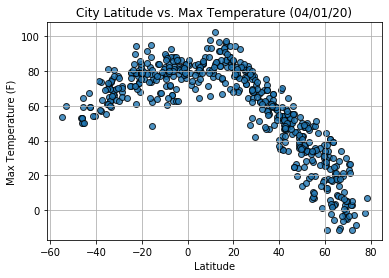

In [10]:
# original output for reference

## Latitude vs. Humidity Plot

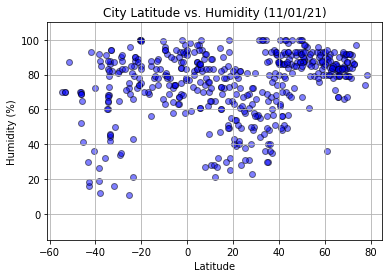

There appears to be no discernable correlation between a city's latitude and humidity.


In [30]:
# plot a scatter plot comparing City Latitude to Humidity
scatter_plot(lat_plot, humid_plot, "Latitude", "Humidity (%)", -61, 85, -15, 110, "City Latitude vs. Humidity (11/01/21)")
plt.grid()

# export .png
plt.savefig("../output_data/Fig2.png")

plt.show()

# print analysis
print(f"There appears to be no discernable correlation between a city's latitude and humidity.")

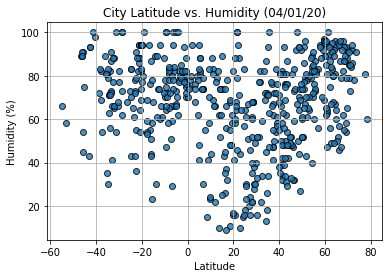

In [11]:
# original output for reference

## Latitude vs. Cloudiness Plot

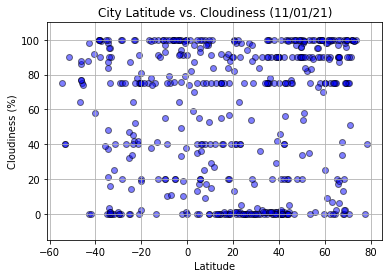

There appears to be no discernable correlation between a city's latitude and cloudiness. The distribution appears fairly even throughout all latitudes.


In [31]:
# Plot a scatter plot comparing City Latitude to Cloudiness
scatter_plot(lat_plot, cloud_plot, "Latitude", "Cloudiness (%)", -61, 85, -15, 110, "City Latitude vs. Cloudiness (11/01/21)")
plt.grid()

# export .png
plt.savefig("../output_data/Fig3.png")

plt.show()

# print analysis
print(f"There appears to be no discernable correlation between a city's latitude and cloudiness. The distribution appears fairly even throughout all latitudes.")

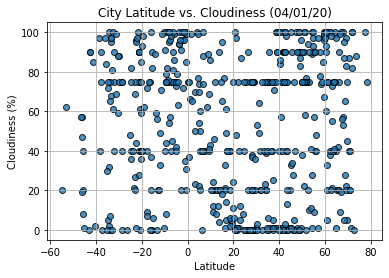

In [12]:
# original output for reference

## Latitude vs. Wind Speed Plot

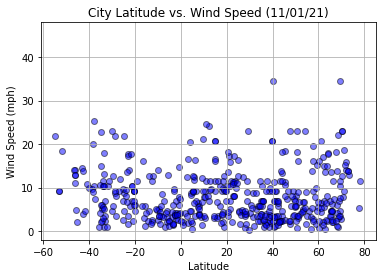

There appears to be no discernable correlation between a city's latitude and wind speed. In general, most cities appear to be within the 0 - 20 mph range.


In [32]:
# plot a scatter plot comparing City Latitude to Wind Speed
scatter_plot(lat_plot, wind_spd_plot, "Latitude", "Wind Speed (mph)", -61, 85, -2, 48, "City Latitude vs. Wind Speed (11/01/21)")
plt.grid()

# export .png
plt.savefig("../output_data/Fig4.png")

plt.show()

# print analysis
print(f"There appears to be no discernable correlation between a city's latitude and wind speed. In general, most cities appear to be within the 0 - 20 mph range.")

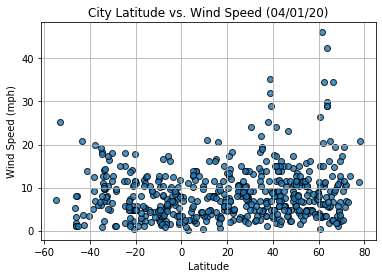

In [13]:
# original output for reference

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [33]:
# define function to run all Northern Hemisphere scatter plots and finding linear regression of latitude to various criteria
def linear_reg_north(x_series, y_series, x_label_lr, y_label_lr, x_lim_0_lr, x_lim_1_lr, y_lim_0_lr, y_lim_1_lr,chart_title_lr,lex,ley):    
    x_lr = clean_df.loc[clean_df[x_series]>=0,:][x_series]
    y_lr = clean_df.loc[clean_df[x_series]>=0,:][y_series]
    
    # perform scipy linear regression
    cities_slope, cities_int, cities_r, cities_p, cities_std_err = stats.linregress(x_lr, y_lr)
    cities_fit = cities_slope * x_lr + cities_int
    
    # run scatter_plot function to get scatter plot 
    scatter_plot(x_lr, y_lr, x_label_lr, y_label_lr, x_lim_0_lr, x_lim_1_lr, y_lim_0_lr, y_lim_1_lr, chart_title_lr)
    
    # create linear regression on scatter plot and annotate
    plt.plot(x_lr,cities_fit,"--",color="red")
    line_eq = "y = " + str(round(cities_slope,2)) + "x + " + str(round(cities_int,2))
    plt.annotate(line_eq,(lex,ley),fontsize=15,color="red")
    
    return cities_slope, cities_int, cities_r, cities_p, cities_std_err, cities_fit

The r-value is: -0.8722468849360699


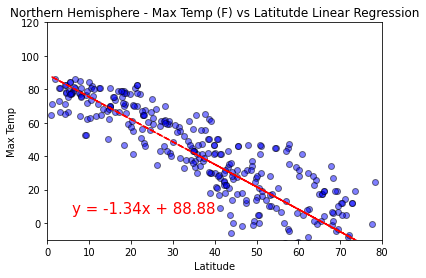

There appears to be a strong correlation with an increase in latitude and decrease in max. temperatures, evidenced by the high r value.


In [34]:
# plot a scatter plot comparing Northern Hemisphere Latitude to Max Temp
temp_ln_n = linear_reg_north("Lat", "Max Temp", "Latitude", "Max Temp", 0, 80, -10, 120, "Northern Hemisphere - Max Temp (F) vs Latitutde Linear Regression",6,6)
print(f"The r-value is: {temp_ln_n[2]}")

# export .png
plt.savefig("../output_data/Fig5.png")

plt.show()

# print analysis
print(f"There appears to be a strong correlation with an increase in latitude and decrease in max. temperatures, evidenced by the high r value.")

The r-value is: 0.46937863826630627


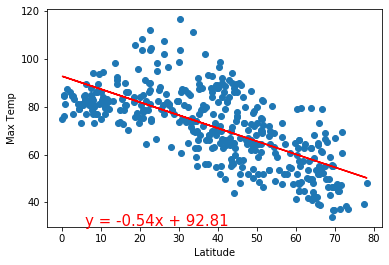

In [25]:
# original output for reference

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [35]:
# define function to run all Southern Hemisphere scatter plots and finding linear regression of latitude to various criteria
def linear_reg_south(x_series, y_series, x_label_lr, y_label_lr, x_lim_0_lr, x_lim_1_lr, y_lim_0_lr, y_lim_1_lr,chart_title_lr,lex,ley):    
    x_lr = clean_df.loc[clean_df[x_series]<0,:][x_series]
    y_lr = clean_df.loc[clean_df[x_series]<0,:][y_series]
    
    # perform scipy linear regression
    cities_slope, cities_int, cities_r, cities_p, cities_std_err = stats.linregress(x_lr, y_lr)
    cities_fit = cities_slope * x_lr + cities_int
    
    # run scatter_plot function to get scatter plot 
    scatter_plot(x_lr, y_lr, x_label_lr, y_label_lr, x_lim_0_lr, x_lim_1_lr, y_lim_0_lr, y_lim_1_lr, chart_title_lr)
    
    # create linear regression on scatter plot and annotate
    plt.plot(x_lr,cities_fit,"--",color="red")
    line_eq = "y = " + str(round(cities_slope,2)) + "x + " + str(round(cities_int,2))
    plt.annotate(line_eq,(lex,ley),fontsize=15,color="red")
    
    return cities_slope, cities_int, cities_r, cities_p, cities_std_err, cities_fit

The r-value is: 0.41420524395082137


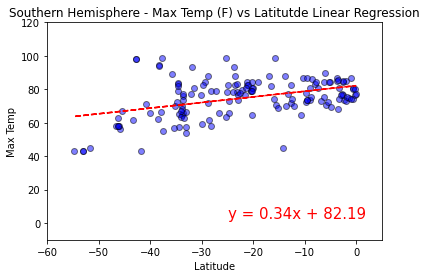

There appears to be somewhat of a correlation with an decrease in latitude (i.e. further from the equator) and decrease in max. temperatures, evidenced by the medium r value.


In [37]:
# plot a scatter plot comparing Southern Hemisphere Latitude to Max Temp
temp_ln_s = linear_reg_south("Lat", "Max Temp", "Latitude", "Max Temp", -60, 5, -10, 120, "Southern Hemisphere - Max Temp (F) vs Latitutde Linear Regression", -25, 3)
print(f"The r-value is: {temp_ln_s[2]}")

# export .png
plt.savefig("../output_data/Fig6.png")

plt.show()

# print analysis
print(f"There appears to be somewhat of a correlation with an decrease in latitude (i.e. further from the equator) and decrease in max. temperatures, evidenced by the medium r value.")

The r-value is: 0.6082708688906918


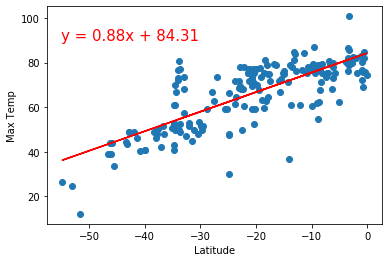

In [26]:
# original output for reference

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.33677060160466066


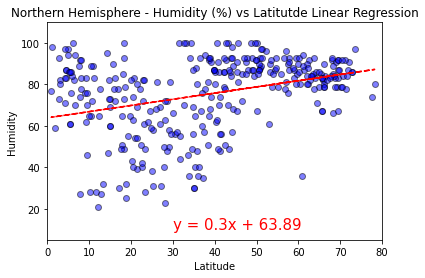

There appears to be a weak correlation with an increase in latitude away from the equator and increase in humidity, evidenced by the somewhat low r value and a lot of datapoints far apart from the linear regression line.


In [45]:
# plot a scatter plot comparing Northern Hemisphere Latitude to Humidity
humid_ln_n = linear_reg_north("Lat", "Humidity", "Latitude", "Humidity", 0, 80, 5, 110, "Northern Hemisphere - Humidity (%) vs Latitutde Linear Regression",30,10)
print(f"The r-value is: {humid_ln_n[2]}")

# export .png
plt.savefig("../output_data/Fig7.png")

plt.show()

# print analysis
print(f"There appears to be a weak correlation with an increase in latitude away from the equator and increase in humidity, evidenced by the somewhat low r value and a lot of datapoints far apart from the linear regression line.")

The r-value is: 0.000543987878808455


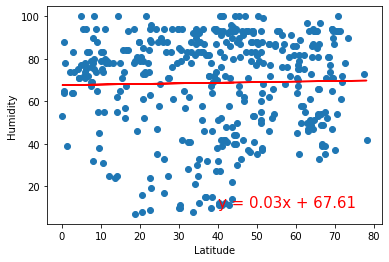

In [27]:
# original output for reference

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3670996018195351


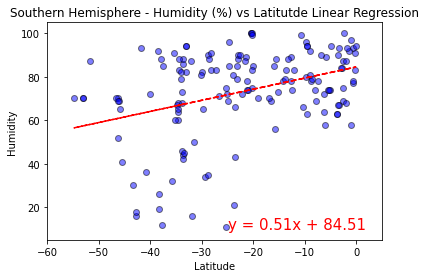

There appears to be a weak correlation with an increase in latitude towards the equator and an increase in humidity, evidenced by the low r value and a lot of datapoints far apart from the linear regression line.


In [42]:
# plot a scatter plot comparing Southern Hemisphere Latitude to Humidity
humid_ln_s = linear_reg_south("Lat", "Humidity", "Latitude", "Humidity", -60, 5, 5, 105, "Southern Hemisphere - Humidity (%) vs Latitutde Linear Regression", -25,10)
print(f"The r-value is: {humid_ln_s[2]}")

# export .png
plt.savefig("../output_data/Fig8.png")

plt.show()

# print analysis
print(f"There appears to be a weak correlation with an increase in latitude towards the equator and an increase in humidity, evidenced by the low r value and a lot of datapoints far apart from the linear regression line.")

The r-value is: 0.014985174297345524


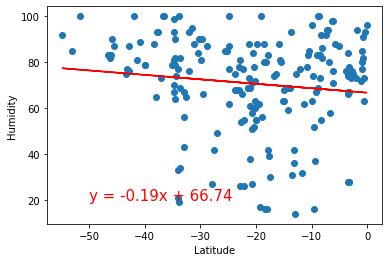

In [28]:
# original output for reference

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.19638544004373443


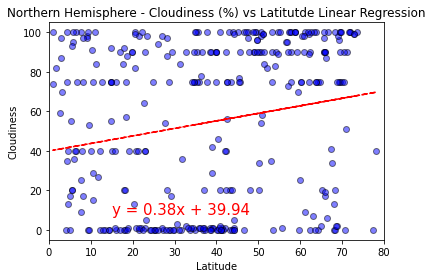

There appears to be a weak correlation with an increase in latitude away from the equator and increase in cloudiness, evidenced by the low r value and a lot of datapoints far apart from the linear regression line.


In [46]:
# plot a scatter plot comparing Northern Hemisphere Latitude to Cloudiness
cloud_ln_n = linear_reg_north("Lat", "Cloudiness", "Latitude", "Cloudiness", 0, 80, -5, 105, "Northern Hemisphere - Cloudiness (%) vs Latitutde Linear Regression",15,8)
print(f"The r-value is: {cloud_ln_n[2]}")

# export .png
plt.savefig("../output_data/Fig9.png")

plt.show()

# print analysis
print(f"There appears to be a weak correlation with an increase in latitude away from the equator and increase in cloudiness, evidenced by the low r value and a lot of datapoints far apart from the linear regression line.")

The r-value is: 0.0020898727664228514


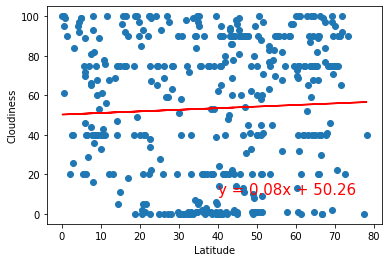

In [29]:
# original output for reference

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.09491952938591794


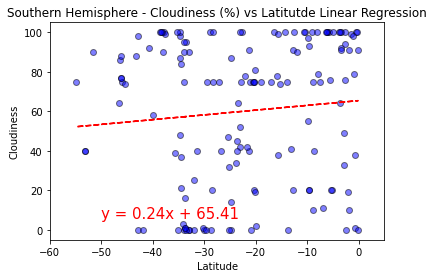

There appears to be a weak correlation with an increase in latitude towards the equator and an increase in cloudiness, evidenced by the low r value and a lot of datapoints far apart from the linear regression line.


In [47]:
# plot a scatter plot comparing Southern Hemisphere Latitude to Cloudiness
cloud_ln_s = linear_reg_south("Lat", "Cloudiness", "Latitude", "Cloudiness", -60, 5, -5, 105, "Southern Hemisphere - Cloudiness (%) vs Latitutde Linear Regression",-50,6)
print(f"The r-value is: {cloud_ln_s[2]}")

# export .png
plt.savefig("../output_data/Fig10.png")

plt.show()

# print analysis
print(f"There appears to be a weak correlation with an increase in latitude towards the equator and an increase in cloudiness, evidenced by the low r value and a lot of datapoints far apart from the linear regression line.")

The r-value is: 0.0035263772085582894


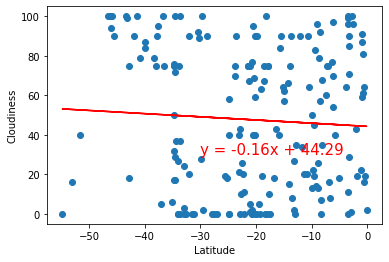

In [30]:
# original output for reference

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03451440190011529


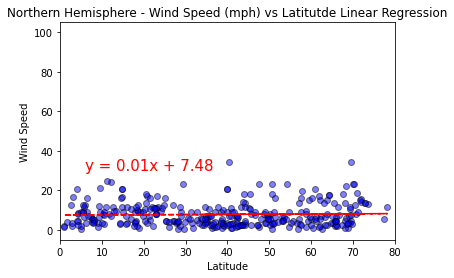

There appears to be a weak correlation with an increase in latitude away from the equator and any change in wind speed, evidenced by the low r value.


In [48]:
# plot a scatter plot comparing Northern Hemisphere Latitude to Wind Speed
wind_ln_n = linear_reg_north("Lat", "Wind Speed", "Latitude", "Wind Speed", 0, 80, -5, 105, "Northern Hemisphere - Wind Speed (mph) vs Latitutde Linear Regression", 6,30)
print(f"The r-value is: {wind_ln_n[2]}")

# export .png
plt.savefig("../output_data/Fig11.png")

plt.show()

# print analysis
print(f"There appears to be a weak correlation with an increase in latitude away from the equator and any change in wind speed, evidenced by the low r value.")

The r-value is: 0.04019723576144484


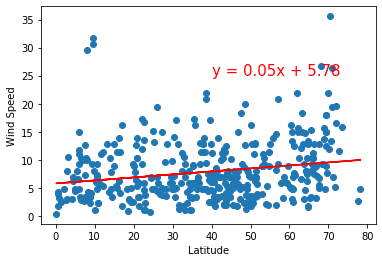

In [31]:
# original output for reference

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.4163365024336692


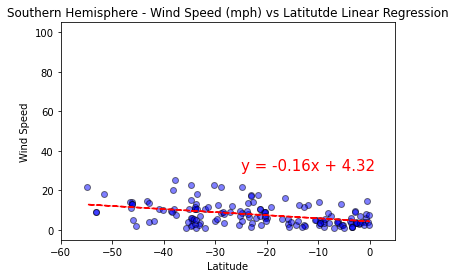

There appears to be a weak correlation with an increase in latitude towards the equator and any change in wind speed, evidenced by the low r value.


In [51]:
# plot a scatter plot comparing Southern Hemisphere Latitude to Wind Speed
wind_ln_s = linear_reg_south("Lat", "Wind Speed", "Latitude", "Wind Speed", -60, 5, -5, 105, "Southern Hemisphere - Wind Speed (mph) vs Latitutde Linear Regression",-25,30)
print(f"The r-value is: {wind_ln_s[2]}")

# export .png
plt.savefig("../output_data/Fig12.png")

plt.show()

# print analysis
print(f"There appears to be a weak correlation with an increase in latitude towards the equator and any change in wind speed, evidenced by the low r value.") 

The r-value is: 0.017128274759839232


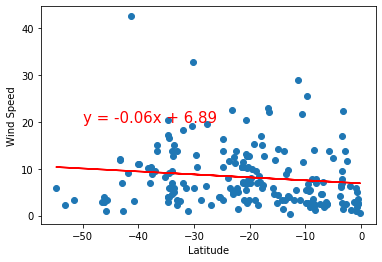

In [32]:
# original output for reference